In [1]:
from libs.simple_hyper_tuner import quick_gridsearchcv_overview
from constants import source_path, target_name, x_path, y_path
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

X = pd.read_csv(x_path)
y = pd.read_csv(y_path)[target_name]

X.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,0.000000,0.222222,0.625000,0.067797,0.041667
1,1,0.006711,0.166667,0.416667,0.067797,0.041667
2,2,0.013423,0.111111,0.500000,0.050847,0.041667
3,3,0.020134,0.083333,0.458333,0.084746,0.041667
4,4,0.026846,0.194444,0.666667,0.067797,0.041667


In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=0)

input_shape = [X_train.shape[1]]
print(input_shape)

[6]


Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 3.0128 - categorical_accuracy: 1.0000

2022-06-18 18:27:47.776379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 435ms/step - loss: 3.0128 - categorical_accuracy: 1.0000 - val_loss: 69.7221 - val_categorical_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 31ms/step - loss: 63.9784 - categorical_accuracy: 1.0000 - val_loss: 5.8550 - val_categorical_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 37ms/step - loss: 5.4723 - categorical_accuracy: 1.0000 - val_loss: 14.1067 - val_categorical_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 34ms/step - loss: 12.8080 - categorical_accuracy: 1.0000 - val_loss: 33.4361 - val_categorical_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 31ms/step - loss: 30.3640 - categorical_accuracy: 1.0000 - val_loss: 21.3400 - val_categorical_accuracy: 1.0000


2022-06-18 18:27:47.985931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 19.3355 - categorical_accuracy: 1.0000 - val_loss: 4.2561 - val_categorical_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 3.8211 - categorical_accuracy: 1.0000 - val_loss: 0.7313 - val_categorical_accuracy: 1.0000
Epoch 8/50
1/1 [==============================] - 0s 25ms/step - loss: 0.7170 - categorical_accuracy: 1.0000 - val_loss: 8.5702 - val_categorical_accuracy: 1.0000
Epoch 9/50
1/1 [==============================] - 0s 28ms/step - loss: 7.9719 - categorical_accuracy: 1.0000 - val_loss: 13.8700 - val_categorical_accuracy: 1.0000
Epoch 10/50
1/1 [==============================] - 0s 28ms/step - loss: 12.8515 - categorical_accuracy: 1.0000 - val_loss: 10.5240 - val_categorical_accuracy: 1.0000
Epoch 11/50
1/1 [==============================] - 0s 27ms/step - loss: 9.7759 - categorical_accuracy: 1.0000 - val_loss: 3.4873 - val_categorical_accuracy: 1.0000
Epoch 12/50
1/1 

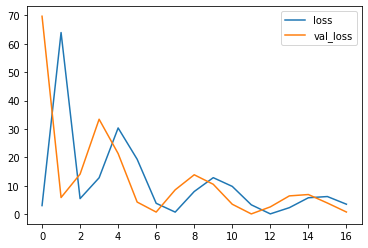

In [34]:
model = keras.Sequential([
    layers.Dense(256, activation='swish', input_shape=input_shape),
    layers.Dense(256, activation='swish'),
    # layers.Dense(256, activation='swish'),
    layers.Dense(1)
])
# val loss 0.1
model.compile(
   optimizer='adam',
   # optimizer='adadelta',
   #  loss='mae',
   loss='mean_squared_error',
   metrics=['categorical_accuracy']
   # metrics=['sparse_categorical_accuracy']
   # metrics=['accuracy']
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=50,
    callbacks=[early_stopping]
)
# print(model.summary())
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

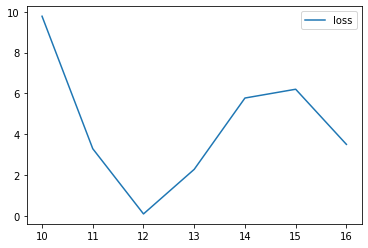

In [35]:
# Loss:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
# history_df['loss'].plot();
history_df.loc[10:, ['loss']].plot();

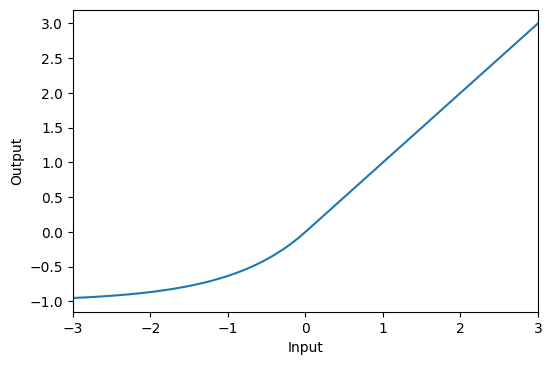

In [19]:
# Change 'relu' to 'elu', 'selu', 'swish'... or something else
import tensorflow as tf
import matplotlib.pyplot as plt

activation_layer = layers.Activation('elu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

AttributeError: 'History' object has no attribute 'predict'

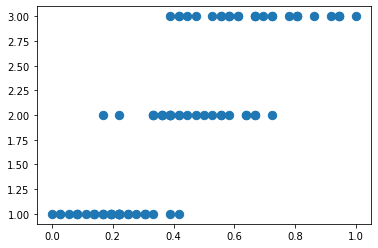

In [33]:

def linear_regression_plot(X, y, model):
    plt.scatter(X, y, s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    plt.show()
    return None


linear_regression_plot(X_train.SepalLengthCm, y_train, history)